# [Intro to earth data science textbook](https://www.earthdatascience.org/courses/intro-to-earth-data-science/)
Tutorial Author: Earth Lab CU Boulder <br>
Name: Geoff Tam <br>
Date Created: 08-25-2022

## [Section 2. File Formats for Earth Data Science](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/)

### Chapter 5. Spatial Data Formats for Earth Data Science 

#### [Lesson 2. Use Raster Data for Earth Data Science](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-raster-data/)

In [1]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

In [13]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [14]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd", 
                             "pre-flood",
                             "lidar",
                             "pre_DTM.tif")
lidar_dtm_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

In [15]:
# Open and read in the digital terrain model
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

# View the data 
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [16]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [17]:
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()>
array(1676.21, dtype=float32)
Coordinates:
    spatial_ref  int32 0 <xarray.DataArray ()>
array(2087.43, dtype=float32)
Coordinates:
    spatial_ref  int32 0


In [18]:
lidar_dtm.shape

(1, 2000, 4000)

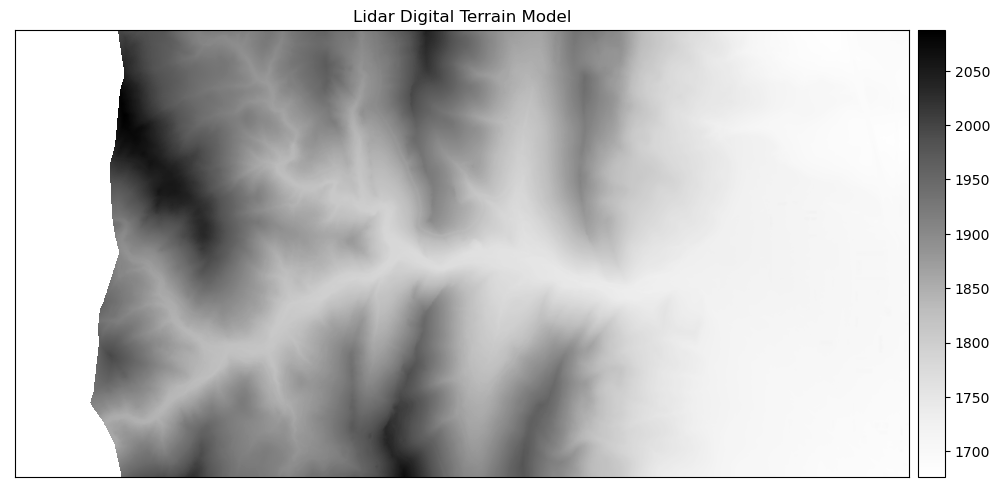

In [19]:
ep.plot_bands(lidar_dtm,
             scale = False,
             cmap = 'Greys',
             title = "Lidar Digital Terrain Model")
plt.show()

In [20]:
# Create path to post flood data
lidar_dem_path_post_flood = os.path.join("colorado-flood", "spatial", 
                                         "boulder-leehill-rd", "post-flood", "lidar", "post_DTM.tif")
lidar_dem_path_post_flood

'colorado-flood\\spatial\\boulder-leehill-rd\\post-flood\\lidar\\post_DTM.tif'

In [21]:
# Read post flood data
lidar_dem = rxr.open_rasterio(lidar_dem_path_post_flood, masked = True)

In [22]:
# View the data
lidar_dem

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [25]:
type(lidar_dem)

xarray.core.dataarray.DataArray

In [24]:
print(lidar_dem.min(), lidar_dem.max())

<xarray.DataArray ()>
array(1675.71, dtype=float32)
Coordinates:
    spatial_ref  int32 0 <xarray.DataArray ()>
array(2111.96, dtype=float32)
Coordinates:
    spatial_ref  int32 0


In [26]:
lidar_dem.shape

(1, 2000, 4000)

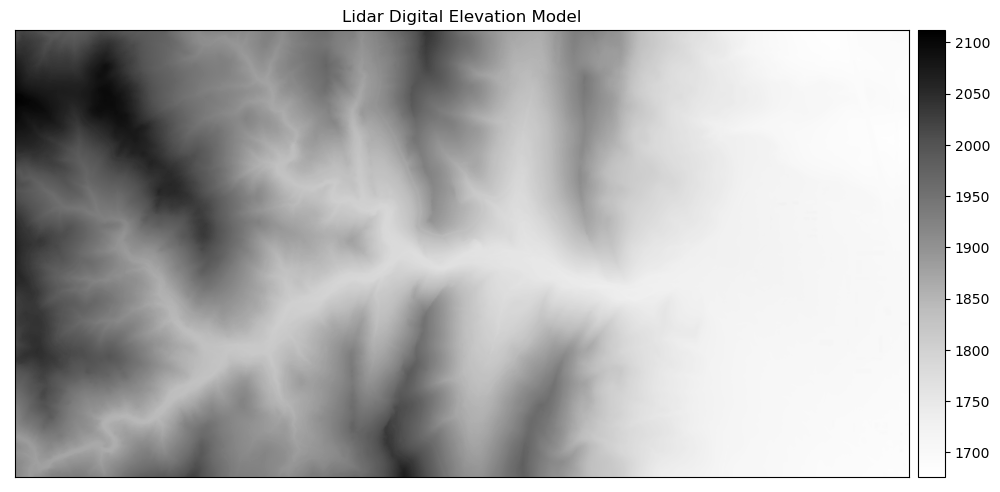

In [35]:
ep.plot_bands(lidar_dem,
       scale = False,
       cmap = 'Greys', 
       title = 'Lidar Digital Elevation Model')

plt.show()

In [36]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to C:\Users\geoff\earth-analytics\data\earthpy-downloads\naip-before-after


'C:\\Users\\geoff\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [37]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads\\naip-before-after\\pre-fire\\crop\\m_3910505_nw_13_1_20150919_crop.tif'

In [38]:
# Open the data using rioxarray
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)

naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0

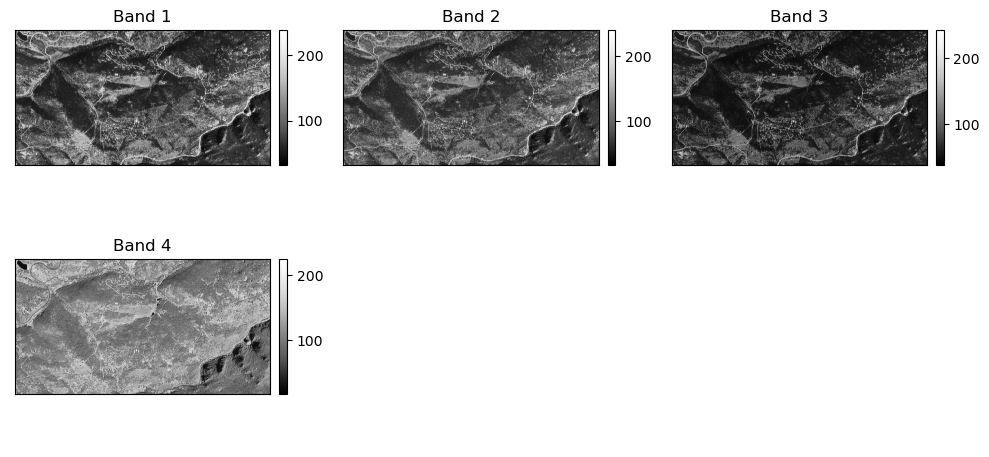

In [39]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

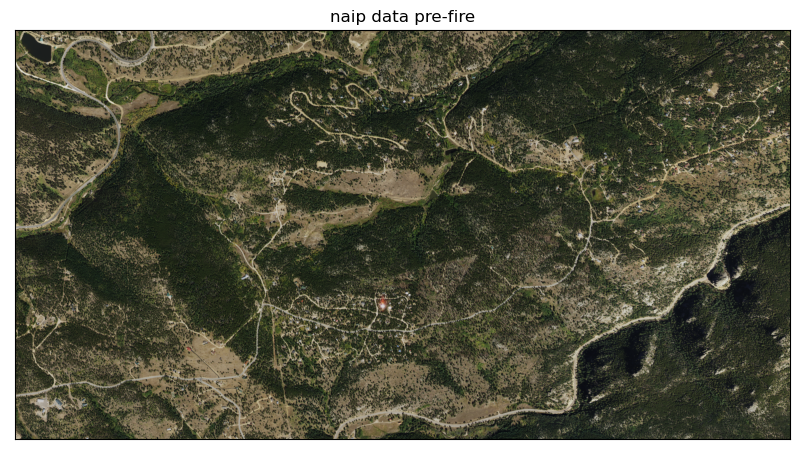

In [42]:
# Plot color image
ep.plot_rgb(naip_pre_fire.values,
            title="naip data pre-fire")
plt.show()

In [43]:
# Create a path for the data file - notice it is a .tif file
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")

naip_post_fire_path

'earthpy-downloads\\naip-before-after\\post-fire\\crop\\m_3910505_nw_13_1_20170902_crop.tif'

In [44]:
# Download post-fire data
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)

naip_post_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  234
    STATISTICS_MEAN:     63.874147003881
    STATISTICS_MINIMUM:  6
    STATISTICS_STDDEV:   47.250919834769
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0

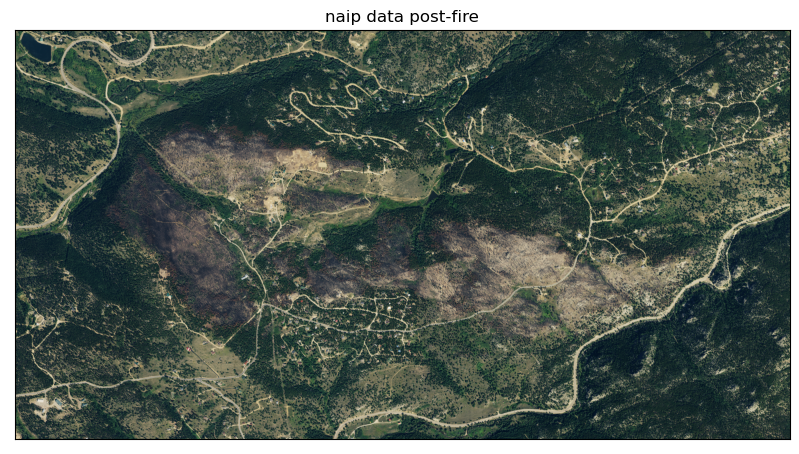

In [45]:
# Plot post-fire rgb image 
ep.plot_rgb(naip_post_fire.values, 
           title = "naip data post-fire")

plt.show()

#### [Lesson 3. Introduction to Spatial Vector Data File Formats in Open Source Python](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/)

In [2]:
# Import packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [3]:
# Download the data and set working directory
#et.data.get_data(
    #url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')

# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [62]:
#coastlines_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_coastline.zip"

#et.data.get_data(url=coastlines_url)

coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline.zip!ne_50m_coastline.shp")

coastlines = gpd.read_file(coastlines_path)
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


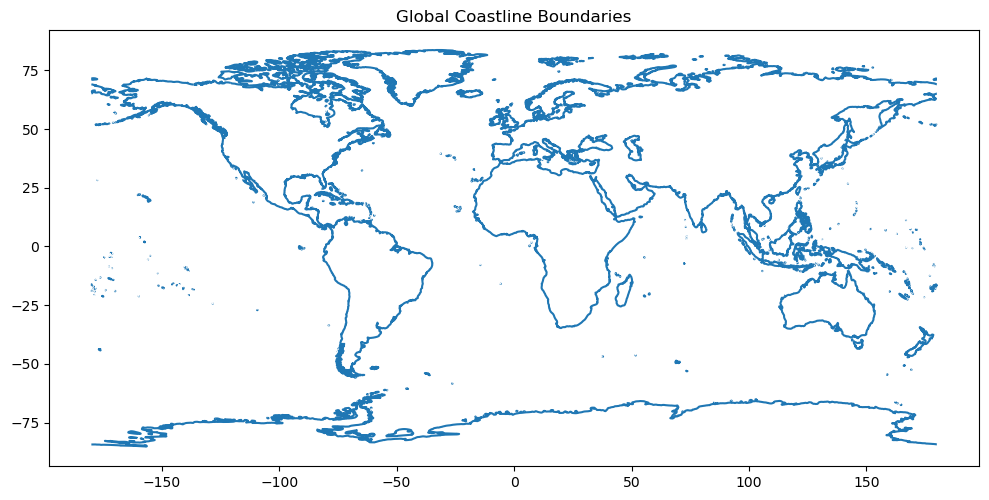

In [63]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

In [64]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: object

In [65]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   object  
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 44.8+ KB


In [5]:
# Open a second layer
#et.data.get_data(
#    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple.zip!ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


In [69]:
cities.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1246    Point
1247    Point
1248    Point
1249    Point
1250    Point
Length: 1251, dtype: object

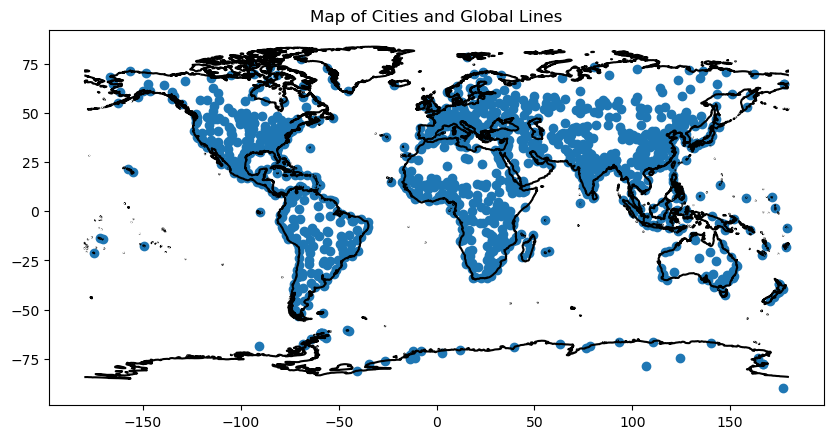

In [74]:
# Create a map or plot iwth two data layers
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
               color = "black")
cities.plot(ax=ax1)

# Add a title
ax1.set(title="Map of Cities and Global Lines")
plt.show()

In [12]:
# Download country boundary data
#country_data_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip"
#et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_50m_admin_0_countries.zip!ne_50m_admin_0_countries.shp")

In [13]:
# Read country shapefile 
countries = gpd.read_file(countries_path)

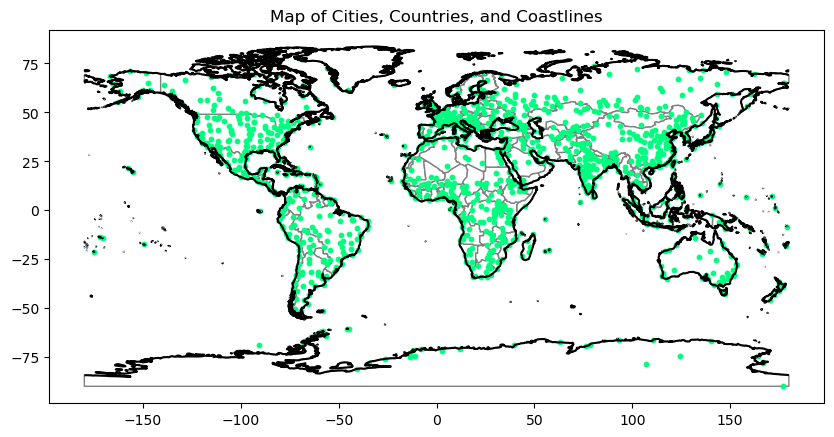

In [89]:
# Create a map or plot with two data layers
f, ax1 = plt.subplots(figsize=(10, 6))
countries.plot(ax=ax1,
              linewidth=1,
              edgecolor="grey",
              color = "white")
cities.plot(ax=ax1,
           color='springgreen',
           markersize = 10)
coastlines.plot(ax=ax1,
               color = "black")
# Add a title
ax1.set(title="Map of Cities, Countries, and Coastlines")
plt.show()

In [90]:
# View cities 
cities.head(5)

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


In [91]:
# View data just in the pop_max column of the cities object
cities.pop_max

0          75000
1          42670
2          69060
3          50762
4          34062
          ...   
1246    11748000
1247    18845000
1248     4630000
1249     5183700
1250     7206000
Name: pop_max, Length: 1251, dtype: int64

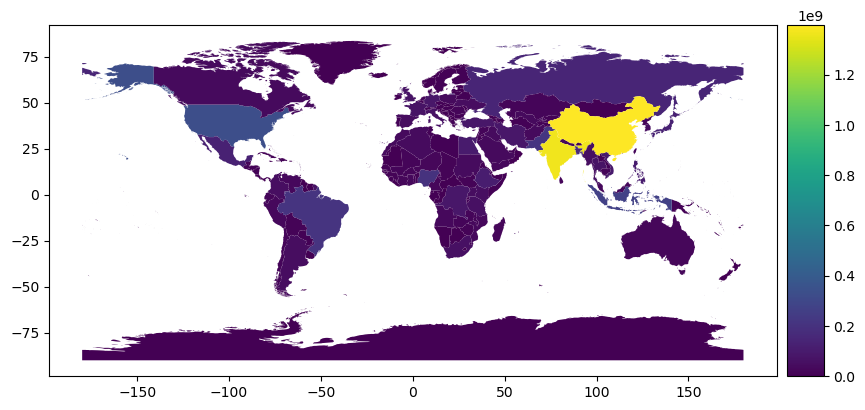

In [92]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax1 = plt.subplots(figsize=(10, 6))

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right",
                          size="5%",
                          pad=0.1)

countries.plot(column='POP_EST',
               legend=True,
               ax=ax1,
               cax=cax)
plt.show()

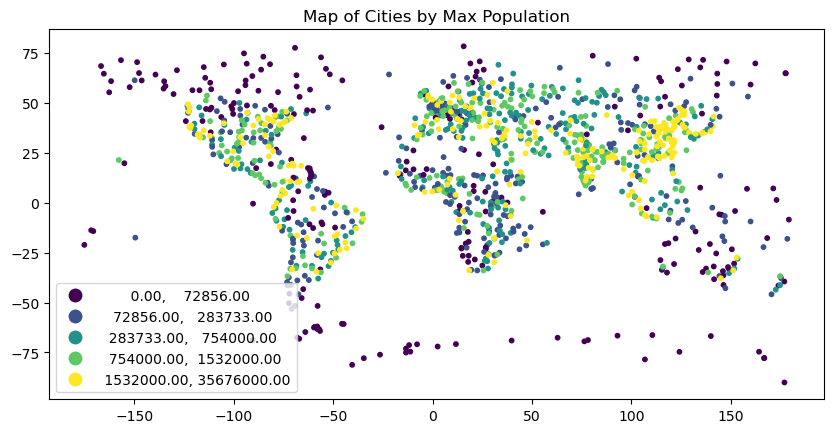

In [10]:
# Create a map of cities symbolizing max population
f, ax1 = plt.subplots(figsize=(10, 6))

cities.plot(column = 'pop_max',
            ax=ax1,
            markersize = 10,
            legend = True,
            scheme = 'quantiles')

# Add a title
ax1.set(title="Map of Cities by Max Population")
plt.show()

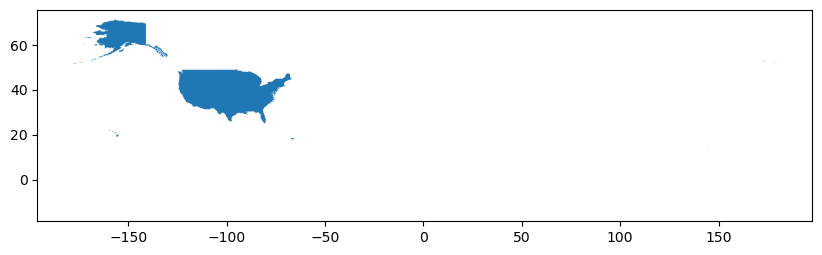

In [14]:
# Subset the countries data to just USA
united_states_boundary = countries.loc[countries['SOVEREIGNT']
                                       == 'United States of America']

f, ax = plt.subplots(figsize=(10, 6))
united_states_boundary.plot(ax=ax)
plt.show()


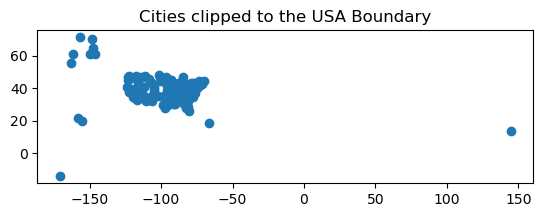

In [15]:
# Clip the cities data to the USA boundary
# Note -- this operation may take some time to run - be patient
cities_in_usa = gpd.clip(cities, united_states_boundary)

# Plot USA cities
f, ax = plt.subplots()
cities_in_usa.plot(ax=ax)
ax.set(title="Cities clipped to the USA Boundary")
plt.show()